<a id="0"></a>
# <p style="background-color:#668539;font-family:newtimeroman;color:#FFFFFF;font-size:250%;text-align:center;border-radius:10px 10px;">FIFA 19 | EDA</p>
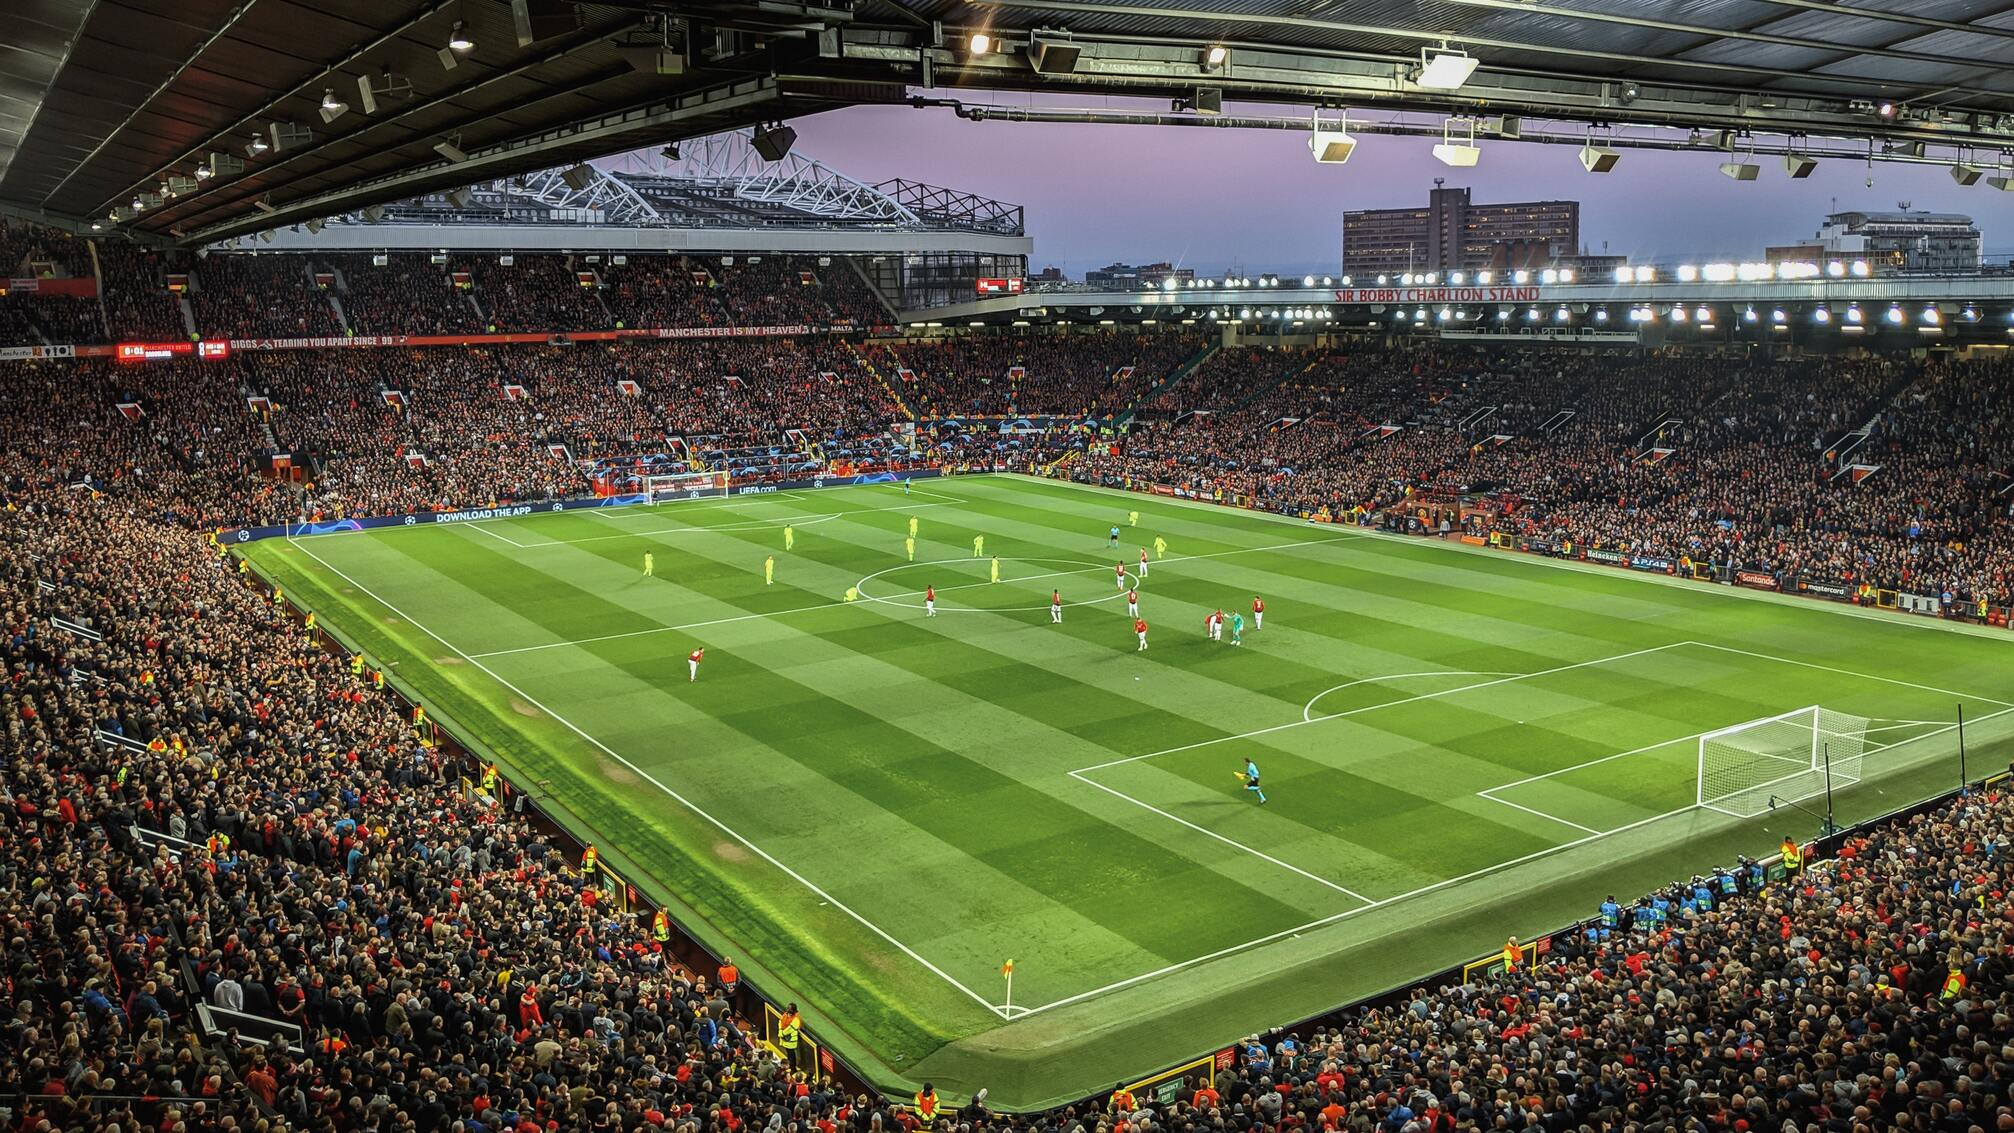
source: https://unsplash.com/photos/7NhFrPxlgM8
<a id="0"></a>
<p style="background-color:#668539;font-family:newtimeroman;color:#FFFFFF;font-size:250%;text-align:center;border-radius:10px 10px;">Introduction</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">In this notebook we will look at distribution of players in clubs and try to analyze various patterns.</p>
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#668539;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:10px 10px;">Table of Contents</p>   
    
* [1. Importing Libraries](#1)
    
* [2. Read DataSet](#2)
    
* [3. Visualize Distribution and Amount](#3)  
    
    
* [4. Conclusion](#4)
    
* [5. End](#5)


<a id="1"></a>
# <p style="background-color:#668539;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:10px 10px;">1.Importing Libraries</p>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
%matplotlib inline

<a id="1"></a>
# <p style="background-color:#668539;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:10px 10px;">2.Read DataSet</p>

In [2]:
data = pd.read_csv("../input/fifa19/data.csv")

In [3]:
data.head(2)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [4]:
data.drop(data.columns[0],inplace=True,axis=1)

In [5]:
print(data.isna().sum().sum()) # many nan values are there

76984


In [6]:
data.shape

(18207, 88)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [8]:
data.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


<p style="background-color:#668539;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:10px 10px;">Object Columns</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">We will now look at Object columns and see how many unique and nan values are there in each category.</p>

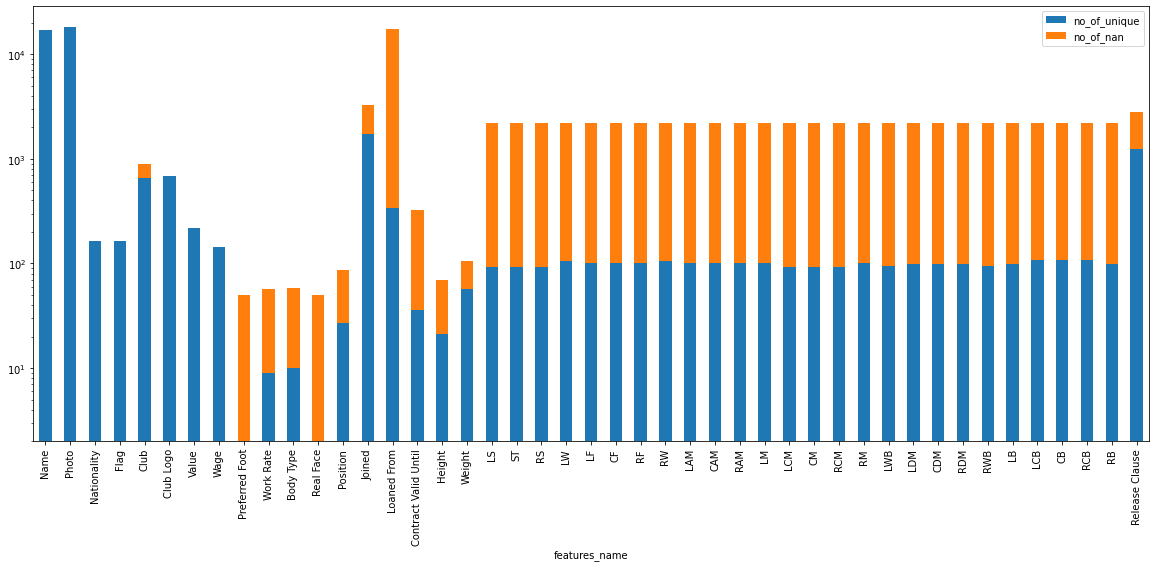

In [9]:
df = data.select_dtypes(['object'])
a = pd.DataFrame([df.columns,  df.nunique(),df.isna().sum()]).T
a.columns =['features_name','no_of_unique','no_of_nan']
a.set_index('features_name',inplace=True)
a.plot(kind='bar',stacked=True,figsize=(20,8))
plt.yscale("log")

<p style="background-color:#668539;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:10px 10px;">int/float Columns</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">We will now look at int/float columns and see how many unique and nan values are there in each category.</p>

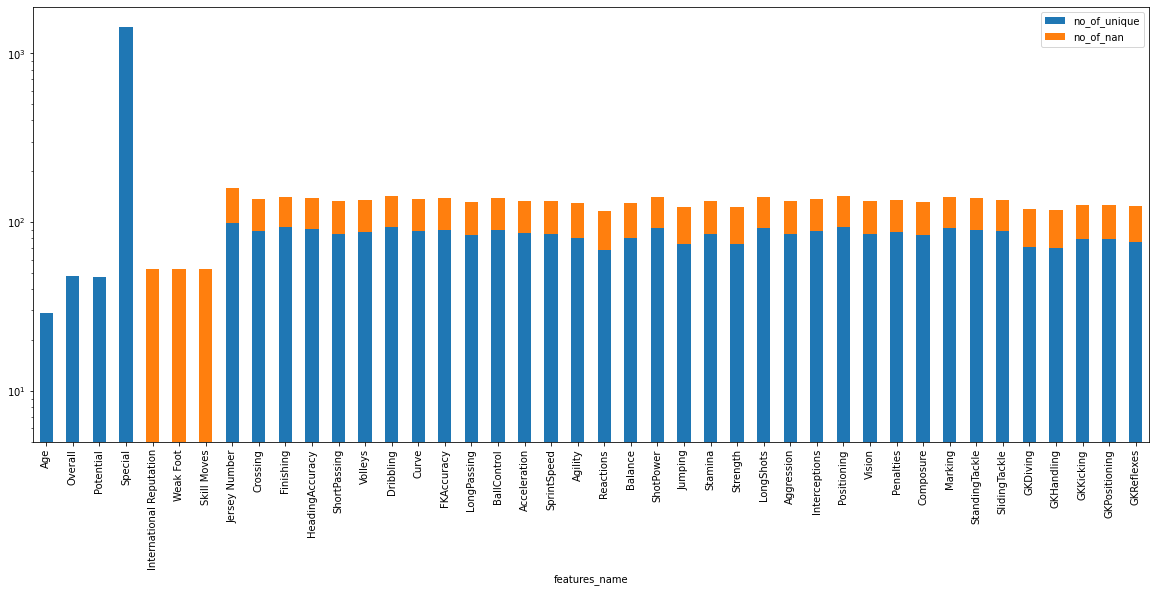

In [10]:
df = data.select_dtypes(exclude=['object']).drop('ID',axis=1)
a = pd.DataFrame([df.columns,  df.nunique(),df.isna().sum()]).T
a.columns =['features_name','no_of_unique','no_of_nan']
a.set_index('features_name',inplace=True)
a.plot(kind='bar',stacked=True,figsize=(20,8))
plt.yscale("log")

<a id="3"></a>
# <p style="background-color:#668539;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:10px 10px;">3.Visualize Distribution and Amount</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">There are many tools to visulalize distribution. The most common tools are as follows:- <br>
1) Histogram<br>
2) Cummulative Distribution<br>
3) Kernel Distribution Function (KDE)<br>
4) Q-Q plot (to check if data is normally distributed or not)<br><br>
There are many tools to visulalize count. The most common tools are as follows:- <br>
1) Barplot<br>
2) Stacked Barplot<br>
3) Scatter plot<br></p>
<p style="background-color:#668539;font-family:newtimeroman;color:#444160;font-size:50%;text-align:center;border-radius:10px 10px;"> ''</p>

<blockquote>
    <p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>Objective no 1:- What is in general age of a football player.</b><br></p>
</blockquote>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">For this we will present Age of various football players as histogram and kernel density plots.<br></p>

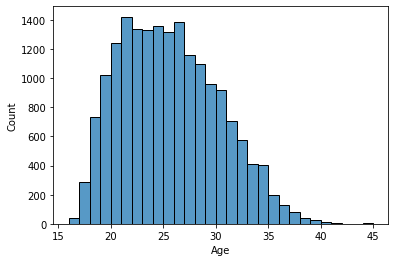

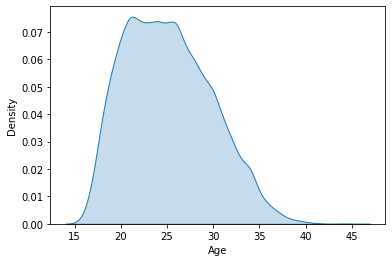

In [11]:
sns.histplot(data = data, x='Age',binwidth=1)
plt.show()
sns.kdeplot(data = data, x='Age',fill=True)
plt.show()

<p style="font-family:newtimeroman;font-size:120%;color:#444160;">
And we see most of the football players age between <b>22-27</b>.<br></p>
<blockquote>
    <p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>Objective no 2:- Compare age of football players of clubs:- FC Barcelona, Chelsea, Juventus and Real Madrid</b><br></p>
</blockquote>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">For this we will will first filter our data whoose Club is one of these 4 clubs. Then we will plot KDE for this data with hue as Club.</p>

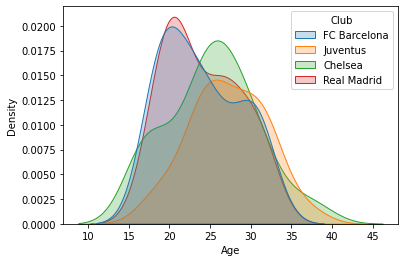

In [12]:
data1 = data[data.Club.isin(['FC Barcelona','Chelsea','Juventus','Real Madrid'])]
sns.kdeplot(data=data1, x='Age',hue='Club',fill=True)
plt.show()

<p style="font-family:newtimeroman;font-size:120%;color:#444160;">
We see players of FC Barcelona and Real Madrid are comparatively younger than players of Chelsea and Juventus</p>
<blockquote>
    <p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>Objective no 3:- Does player value depend on whether they are lefty or righty.</b><br></p>
</blockquote>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">For this we will create new columns <i>cost</i> using the <i>Value</i> column. And then plot the histplot with hue as <i>Preffered Foot.</i></p>

In [13]:
data.head(2)[['Value']]

,Value
0,€110.5M
1,€77M


In [14]:
def return_float(x):
    if x =="":
        return 0
    else:
        return float(x)
    
data['cost']=data.Value.apply(lambda x: str(x)[1:-1]).apply(lambda x: return_float(x))
data.head(2)[['Value','cost']]

,Value,cost
0,€110.5M,110.5
1,€77M,77.0


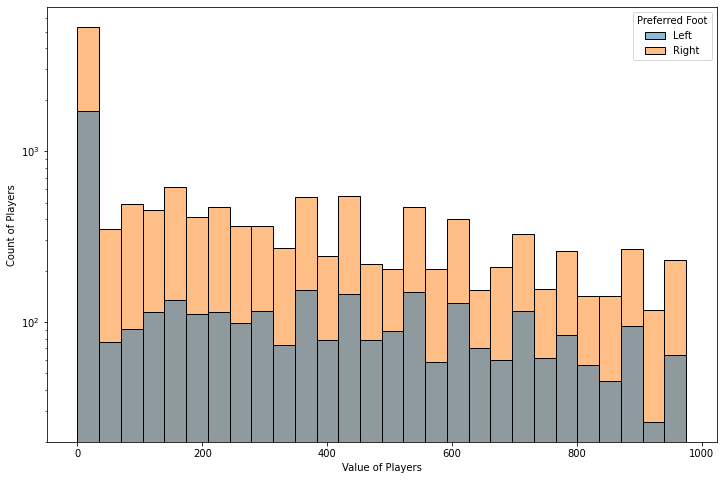

In [15]:
plt.figure(figsize=(12,8))
ax=sns.histplot(data=data, x='cost',hue='Preferred Foot')
ax.set_yscale('log')
ax.set_xlabel('Value of Players')
ax.set_ylabel("Count of Players")
plt.show()

<p style="font-family:newtimeroman;font-size:120%;color:#444160;">
We see there are more no of righty players in all value range. So in general value of player don't depend on preffered foot. We also see extreme values that when playes whoose value is greater than around 900M are mostly lefty.</p>
<blockquote>
    <p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b>Objective no 4:- We will look at distribution of International Reputation using Q-Q plot.</b><br></p>
</blockquote>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;"> We will now check if <i>International Reputation</i> is normally distributed or not.<br></p>

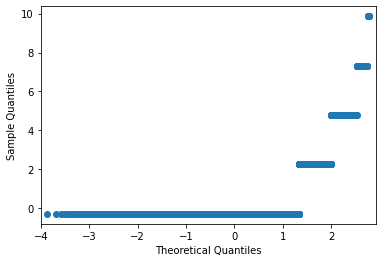

In [16]:
dta = (data['International Reputation']- data['International Reputation'].mean())/data['International Reputation'].std()
qqplot(dta,line='s')
plt.show()

<a id="4"></a>
<p style="background-color:#668539;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Conclusion</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">That is all for now.<br>
If you found something interesting 🙂 please do <b><span style="color:crimson; font-size:20px">UPVOTE👍</span></b></p>

**<span style="color:#444160;"> Thanks!</span>**
<a id="5"></a>
<p style="background-color:#668539;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">End</p>
    <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>